<a href="https://colab.research.google.com/github/ydebessu/handson/blob/main/nnp/02hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nnfs

In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import matplotlib.pyplot as plt
import nnfs
nnfs.init()

X shape: (300, 2)
X type: <class 'numpy.ndarray'>
y shape: (300,)
y type: <class 'numpy.ndarray'>


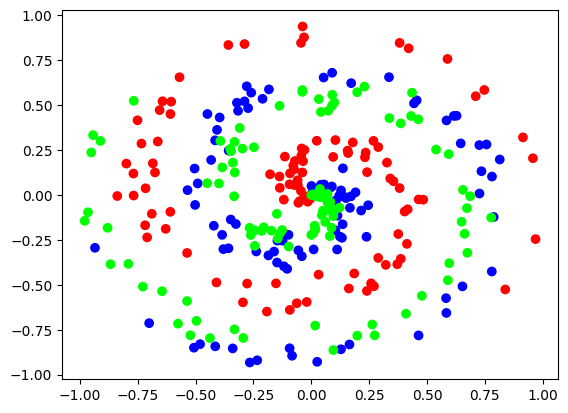

In [3]:
# Generate data from spiral_data with three classes and plot with scatter colored rgb for each class

X, y = spiral_data(samples=100, classes=3)
print(f'X shape: {X.shape}')
print(f'X type: {type(X)}')
print(f'y shape: {y.shape}')
print(f'y type: {type(y)}')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

## Adding Layers

In [4]:
class Layer_Dense:
  """
  A dense layer with weights and biases.
  """
  def __init__(self, n_inputs, n_neurons):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    # Calculate gradients
    pass


## Activation

In [5]:
# ReLU Activation class
class Activation_ReLU:
  def forward(self, inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    # Calculate output values from inputs
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

## Example

In [6]:
# Create a dense layer with 2 input features and 3 neurons
class_size = 3
X, y = spiral_data(samples=100, classes=class_size)
input_size = X.shape[1]
hdim = 3

layer1 = Layer_Dense(input_size, hdim)
layer2 = Layer_Dense(hdim, class_size)
activation1 = Activation_ReLU()
activation2 = Activation_Softmax()


print(f"Layer 1 weights: {layer1.weights}")
print(f"Layer 1 bias: {layer1.biases}")
layer1.forward(X)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)

print(activation2.output[:5])

Layer 1 weights: [[-0.01550429  0.00417319 -0.00944368]
 [ 0.00238103 -0.01405963 -0.00590058]]
Layer 1 bias: [[0. 0. 0.]]
[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]
